<a href="https://colab.research.google.com/github/mlKwon/railway/blob/main/rail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --upgrade ipykernel
!pip install pyjanitor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.0/154.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.6 MB/s eta 0:00:00
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.25.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.3/171.3 kB 3.4 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import torch
import torch.nn
from collections import Counter
from copy import deepcopy as dc
import gc, glob, os
from matplotlib import pyplot as plt
import seaborn as sns
from janitor import clean_names as cn

from google.colab import drive
drive.mount('/content/drive')
os.chdir("drive/MyDrive/railroad")

/usr/local/lib/python3.10/dist-packages/pexpect/popen_spawn.py:60: DeprecationWarning: setDaemon() is deprecated, set the daemon attribute instead
  self._read_thread.setDaemon(True)


Mounted at /content/drive


**데이터 컬럼 읽어오기**

In [ ]:
# @title 데이터 컬럼 읽어오기
print(os.listdir())

cols = pd.read_csv('data_columns.csv')
cols

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  getpass.getpass = self._save_getpass


['lane_data_columns.csv', '차량_및_요댐퍼.xlsx', 'data_s70.csv', 'data_s100.csv', 'data_c30.csv', 'data_s30.csv', 'data_s50.csv', 'data_s40.csv', 'data_columns.csv', 'data_c100.csv', 'data_c70.csv', 'data_c50.csv', 'answer_sample.csv', 'lane_data_s.csv', 'data_c40.csv', 'lane_data_c.csv', 'data.zip', '2023 제1회 철도 인공지능 경진대회 모델 설명서.docx', '태스크1.png', '데이터_메트릭.png', 'rail_dictionary.xls', '데이터_컬럼_유니코드.csv', 'lgbm_c.csv', 'lgbm_s.csv', 'lgbm_predict.csv']


,name,description
0,Distance,거리[m]
1,A_M1_C_B1_Y,대차상부 차체 횡가속도[m/s^2]
2,A_M1_C_B1_Z,대차상부 차체 수직가속도[m/s^2]
3,A_M1_B1_W1_Y_L,좌측 전위 대차 프레임 횡가속도[m/s^2]
4,A_M1_B1_BC_Y_L,좌측 중앙 대차 프레임 횡가속도[m/s^2]
5,A_M1_B1_W2_Y_L,좌측 후위 대차 프레임 횡가속도[m/s^2]
6,A_M1_B1_W1_Y_R,우측 전위 대차 프레임 횡가속도[m/s^2]
7,A_M1_B1_BC_Y_R,우측 중앙 대차 프레임 횡가속도[m/s^2]
8,A_M1_B1_W2_Y_R,우측 후위 대차 프레임 횡가속도[m/s^2]
9,A_M1_B1_W1_Z_L,좌측 전위 대차 프레임 수직가속도[m/s^2]


In [ ]:
pd.read_csv('lane_data_columns.csv',encoding='cp949')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,type,name,description
0,curve,Distance,거리[m]
1,curve,Curvature,곡률[1/km]
2,curve,Vertical offset,선로중심부 높이[mm]
3,curve,Cross level offset,캔트[mm]
4,straight,Distance,거리[m]
5,straight,Cross level irregularity,우측 선로에 대한 좌측 선로 높이차(캔트) 불규칙도[mm]
6,straight,Curvature irregularity,곡선에 대한 불규칙도[1/km]
7,straight,Lateral irregularity,수평 불규칙도[mm]
8,straight,Vertical irregularity,수직 불규칙도[mm]
9,straight,Gauge variation,선로 게이지(좌우거리차이) 불규칙도[mm]


**태스크, 데이터 및 메트릭 정의**

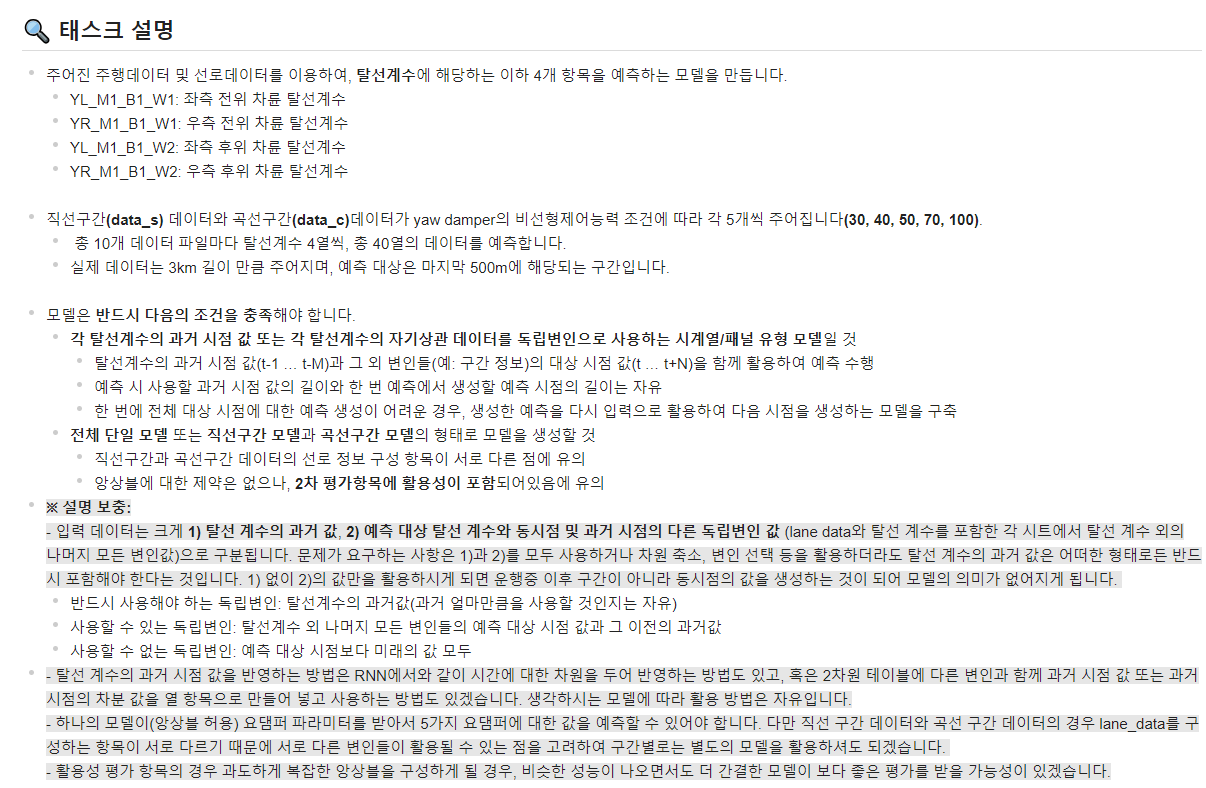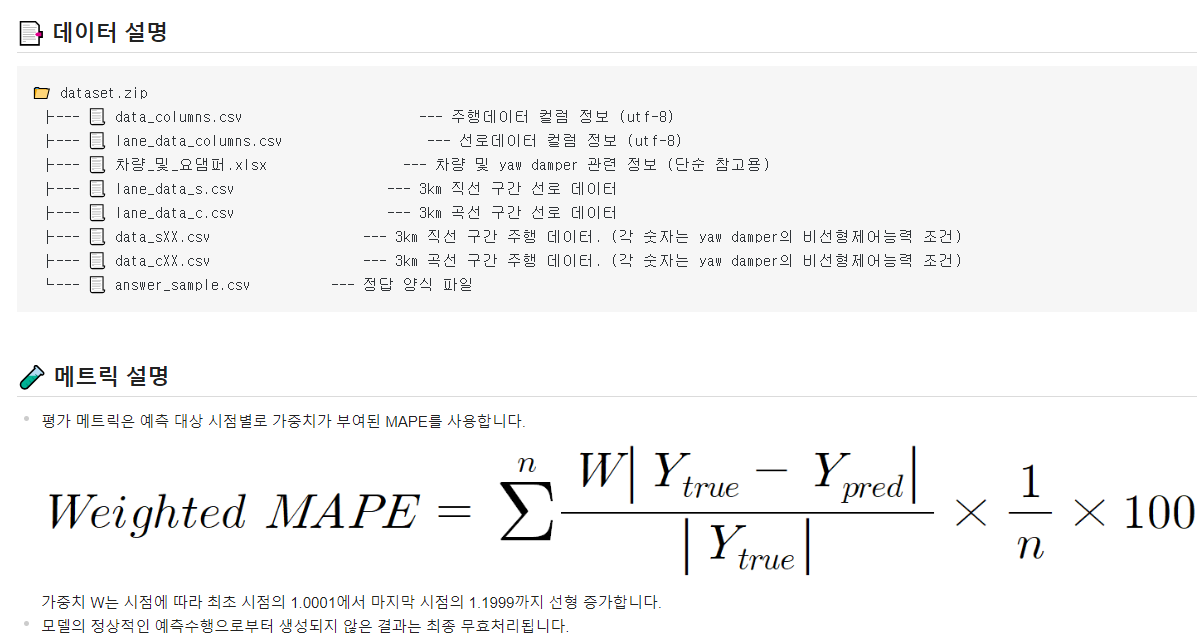

In [4]:
dat_lst = {}
for nm in os.listdir():
  if ('data_s' in nm) | ('data_c' in nm):
    if '.csv' in nm:
      print(nm)
      try:
        dat_lst[nm.replace(".csv","")] = cn(pd.read_csv(nm))
      except:
        dat_lst[nm.replace(".csv","")] = cn(pd.read_csv(nm, encoding='cp949'))
# os.listdir()
# dat_lst

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  getpass.getpass = self._save_getpass


lane_data_columns.csv
data_s70.csv
data_s100.csv
data_c30.csv
data_s30.csv
data_s50.csv
data_s40.csv
data_columns.csv
data_c100.csv
data_c70.csv
data_c50.csv
lane_data_s.csv
data_c40.csv
lane_data_c.csv


**EDA**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


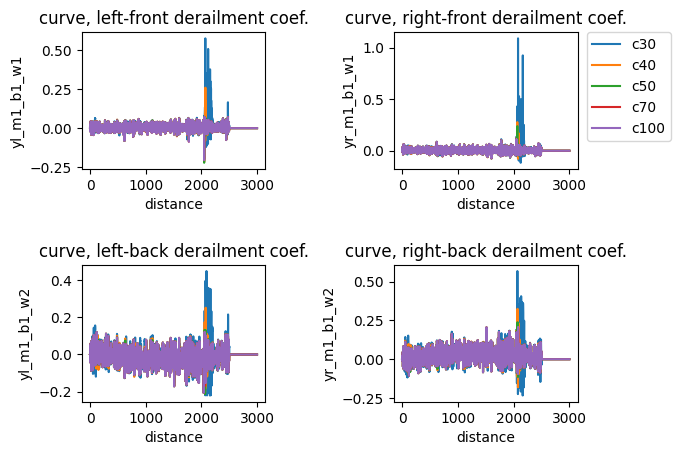

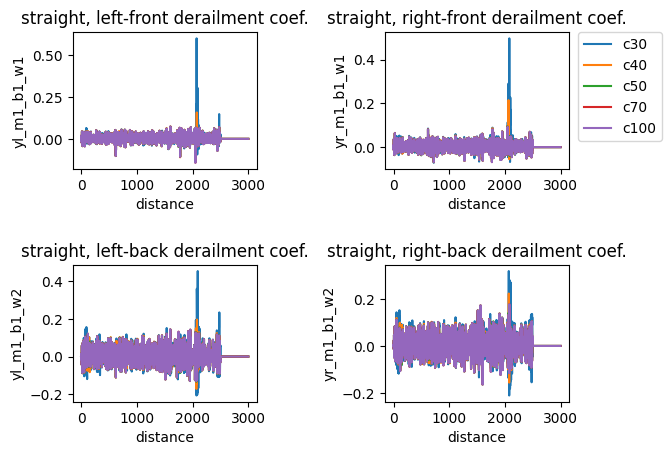

In [ ]:
# @title EDA
from matplotlib import pyplot as plt
from matplotlib import gridspec
import seaborn as sns

# temp = dat_lst['data_s30'].loc[:,['distance','yl_m1_b1_w1','yr_m1_b1_w1','yl_m1_b1_w2','yr_m1_b1_w2']]

# sns.lineplot(data=dat_lst['data_s30'], x='distance', y='yl_m1_b1_w1', color='red')
# sns.lineplot(data=dat_lst['data_c30'], x='distance', y='yl_m1_b1_w1', color='blue', alpha=.5)
# sns.lineplot(data=dat_lst['data_s100'], x='distance', y='yl_m1_b1_w1', color='green', alpha=.5)
# sns.lineplot(data=dat_lst['data_c100'], x='distance', y='yl_m1_b1_w1', color='red', alpha=.5)

# fig = plt.figure(figsize=(15, 6))
# gs = gridspec.GridSpec(nrows=2, # row 몇 개
#                        ncols=2, # col 몇 개
# )

plt.subplot(2,2,1)
sns.lineplot(data=dat_lst['data_c30'], x='distance', y='yl_m1_b1_w1')
sns.lineplot(data=dat_lst['data_c40'], x='distance', y='yl_m1_b1_w1')
sns.lineplot(data=dat_lst['data_c50'], x='distance', y='yl_m1_b1_w1')
sns.lineplot(data=dat_lst['data_c70'], x='distance', y='yl_m1_b1_w1')
sns.lineplot(data=dat_lst['data_c100'], x='distance', y='yl_m1_b1_w1')
plt.title("curve, left-front derailment coef.")

plt.subplot(2,2,2)
sns.lineplot(data=dat_lst['data_c30'], x='distance', y='yr_m1_b1_w1',label='c30')
sns.lineplot(data=dat_lst['data_c40'], x='distance', y='yr_m1_b1_w1',label='c40')
sns.lineplot(data=dat_lst['data_c50'], x='distance', y='yr_m1_b1_w1',label='c50')
sns.lineplot(data=dat_lst['data_c70'], x='distance', y='yr_m1_b1_w1',label='c70')
sns.lineplot(data=dat_lst['data_c100'], x='distance', y='yr_m1_b1_w1',label='c100')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("curve, right-front derailment coef.")

plt.subplot(2,2,3)
sns.lineplot(data=dat_lst['data_c30'], x='distance', y='yl_m1_b1_w2')
sns.lineplot(data=dat_lst['data_c40'], x='distance', y='yl_m1_b1_w2')
sns.lineplot(data=dat_lst['data_c50'], x='distance', y='yl_m1_b1_w2')
sns.lineplot(data=dat_lst['data_c70'], x='distance', y='yl_m1_b1_w2')
sns.lineplot(data=dat_lst['data_c100'], x='distance', y='yl_m1_b1_w2')
plt.title("curve, left-back derailment coef.")

plt.subplot(2,2,4)
sns.lineplot(data=dat_lst['data_c30'], x='distance', y='yr_m1_b1_w2')
sns.lineplot(data=dat_lst['data_c40'], x='distance', y='yr_m1_b1_w2')
sns.lineplot(data=dat_lst['data_c50'], x='distance', y='yr_m1_b1_w2')
sns.lineplot(data=dat_lst['data_c70'], x='distance', y='yr_m1_b1_w2')
sns.lineplot(data=dat_lst['data_c100'], x='distance', y='yr_m1_b1_w2')
plt.title("curve, right-back derailment coef.")

plt.subplots_adjust(hspace=0.7, wspace=0.7)

plt.show()


plt.subplot(2,2,1)
sns.lineplot(data=dat_lst['data_s30'], x='distance', y='yl_m1_b1_w1')
sns.lineplot(data=dat_lst['data_s40'], x='distance', y='yl_m1_b1_w1')
sns.lineplot(data=dat_lst['data_s50'], x='distance', y='yl_m1_b1_w1')
sns.lineplot(data=dat_lst['data_s70'], x='distance', y='yl_m1_b1_w1')
sns.lineplot(data=dat_lst['data_s100'], x='distance', y='yl_m1_b1_w1')
plt.title("straight, left-front derailment coef.")

plt.subplot(2,2,2)
sns.lineplot(data=dat_lst['data_s30'], x='distance', y='yr_m1_b1_w1',label='c30')
sns.lineplot(data=dat_lst['data_s40'], x='distance', y='yr_m1_b1_w1',label='c40')
sns.lineplot(data=dat_lst['data_s50'], x='distance', y='yr_m1_b1_w1',label='c50')
sns.lineplot(data=dat_lst['data_s70'], x='distance', y='yr_m1_b1_w1',label='c70')
sns.lineplot(data=dat_lst['data_s100'], x='distance', y='yr_m1_b1_w1',label='c100')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("straight, right-front derailment coef.")

plt.subplot(2,2,3)
sns.lineplot(data=dat_lst['data_s30'], x='distance', y='yl_m1_b1_w2')
sns.lineplot(data=dat_lst['data_s40'], x='distance', y='yl_m1_b1_w2')
sns.lineplot(data=dat_lst['data_s50'], x='distance', y='yl_m1_b1_w2')
sns.lineplot(data=dat_lst['data_s70'], x='distance', y='yl_m1_b1_w2')
sns.lineplot(data=dat_lst['data_s100'], x='distance', y='yl_m1_b1_w2')
plt.title("straight, left-back derailment coef.")

plt.subplot(2,2,4)
sns.lineplot(data=dat_lst['data_s30'], x='distance', y='yr_m1_b1_w2')
sns.lineplot(data=dat_lst['data_s40'], x='distance', y='yr_m1_b1_w2')
sns.lineplot(data=dat_lst['data_s50'], x='distance', y='yr_m1_b1_w2')
sns.lineplot(data=dat_lst['data_s70'], x='distance', y='yr_m1_b1_w2')
sns.lineplot(data=dat_lst['data_s100'], x='distance', y='yr_m1_b1_w2')
plt.title("straight, right-back derailment coef.")

plt.subplots_adjust(hspace=0.7, wspace=0.7)

plt.show()

corplot

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


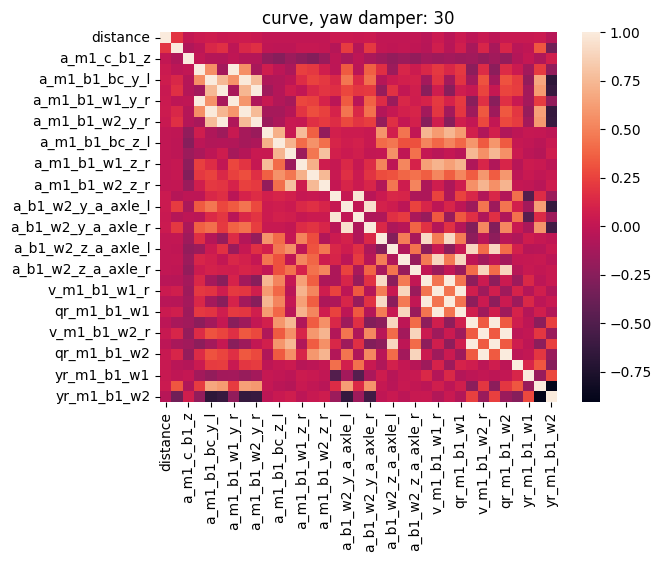

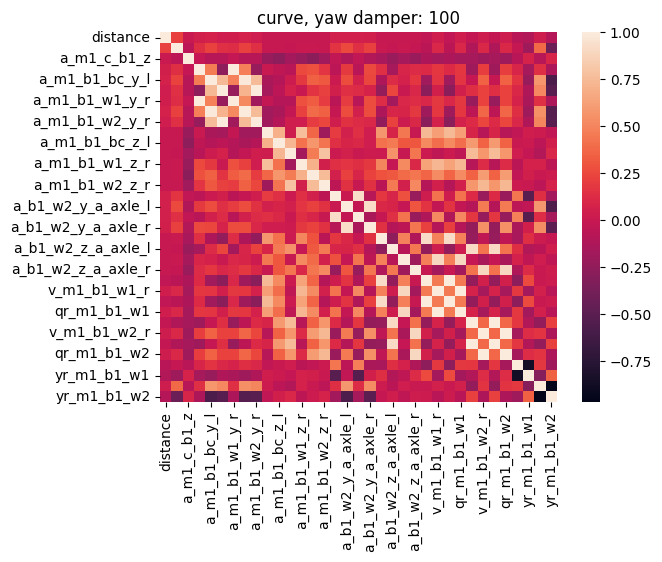

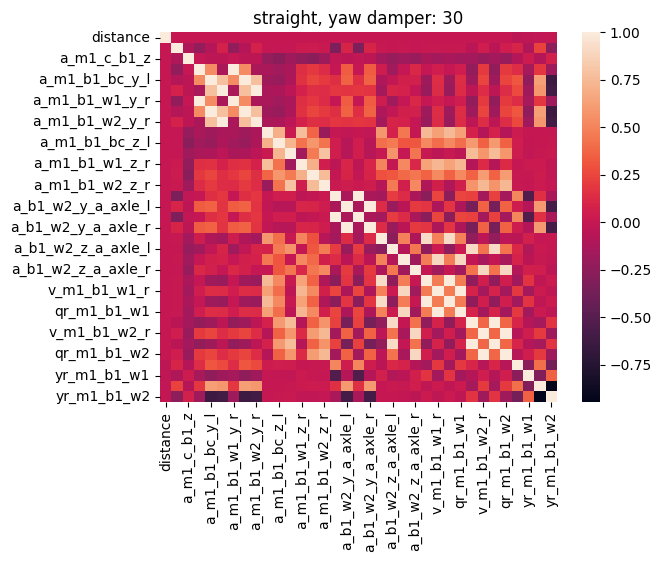

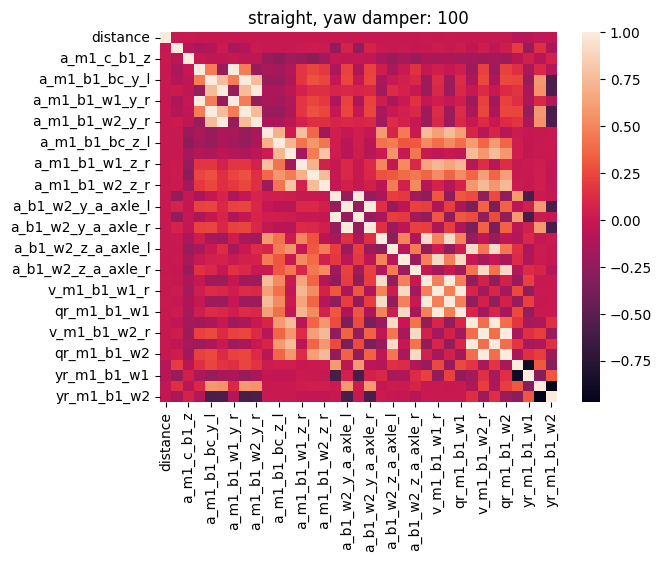

In [ ]:
sns.heatmap(data=dat_lst['data_c30'].corr())
plt.title('curve, yaw damper: 30')
plt.show()

sns.heatmap(data=dat_lst['data_c100'].corr())
plt.title('curve, yaw damper: 100')
plt.show()

sns.heatmap(data=dat_lst['data_s30'].corr())
plt.title('straight, yaw damper: 30')
plt.show()

sns.heatmap(data=dat_lst['data_s100'].corr())
plt.title('straight, yaw damper: 100')
plt.show()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


       distance  curvature  vertical_offset  cross_level_offset
0          0.00        0.0              0.0                 0.0
1          0.25        0.0              0.0                 0.0
2          0.50        0.0              0.0                 0.0
3          0.75        0.0              0.0                 0.0
4          1.00        0.0              0.0                 0.0
...         ...        ...              ...                 ...
11995   2998.75        0.0              0.0                 0.0
11996   2999.00        0.0              0.0                 0.0
11997   2999.25        0.0              0.0                 0.0
11998   2999.50        0.0              0.0                 0.0
11999   2999.75        0.0              0.0                 0.0

[12000 rows x 4 columns]
       distance  cross_level  curvature  lateral  vertical  gauge
0          0.00        0.081      0.002    1.308     1.155  0.345
1          0.25        0.251      0.002    1.282     1.157  0.151
2       

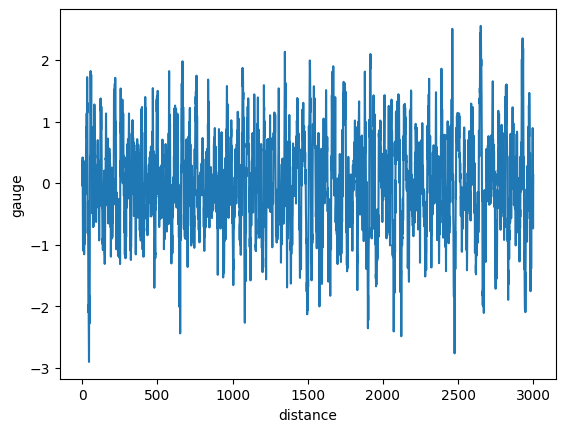

In [ ]:
print(dat_lst['lane_data_c'])
print(dat_lst['lane_data_s'])

sns.lineplot(data=dat_lst['lane_data_s'], x='distance', y='gauge')
plt.show()

In [ ]:
print(dat_lst.keys())

# c30
c30 = pd.merge(dat_lst['lane_data_c'],dat_lst['data_c30'], how='outer', on='distance')
print(c30)

s30 = pd.merge(dat_lst['lane_data_s'],dat_lst['data_s30'], how='outer', on='distance')
s30

dict_keys(['lane_data_columns', 'data_s70', 'data_s100', 'data_c30', 'data_s30', 'data_s50', 'data_s40', 'data_columns', 'data_c100', 'data_c70', 'data_c50', 'lane_data_s', 'data_c40', 'lane_data_c'])
       distance  curvature  vertical_offset  cross_level_offset   a_m1_c_b1_y  \
0          0.00        0.0              0.0                 0.0 -1.273400e-09   
1          0.25        0.0              0.0                 0.0  1.485600e-05   
2          0.50        0.0              0.0                 0.0  2.706500e-04   
3          0.75        0.0              0.0                 0.0  1.247900e-03   
4          1.00        0.0              0.0                 0.0  3.080900e-03   
...         ...        ...              ...                 ...           ...   
11995   2998.75        0.0              0.0                 0.0  8.982300e-02   
11996   2999.00        0.0              0.0                 0.0  1.039000e-01   
11997   2999.25        0.0              0.0                 0.0  1.147

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,distance,cross_level,curvature,lateral,vertical,gauge,a_m1_c_b1_y,a_m1_c_b1_z,a_m1_b1_w1_y_l,a_m1_b1_bc_y_l,...,ql_m1_b1_w1,qr_m1_b1_w1,v_m1_b1_w2_l,v_m1_b1_w2_r,ql_m1_b1_w2,qr_m1_b1_w2,yl_m1_b1_w1,yr_m1_b1_w1,yl_m1_b1_w2,yr_m1_b1_w2
0,0.00,0.081,0.002,1.308,1.155,0.345,-1.273400e-09,-1.943500e-08,0.022194,0.022194,...,-0.305900,0.354800,0.000832,0.000847,0.000012,0.000012,0.001366,0.001558,0.001412,0.001406
1,0.25,0.251,0.002,1.282,1.157,0.151,1.485600e-05,3.403000e-06,0.161500,0.159800,...,-0.086214,0.088455,-0.010882,0.012985,-0.000163,0.000191,0.007337,-0.004638,0.001448,0.001525
2,0.50,0.421,0.002,1.256,1.159,-0.043,2.706500e-04,5.112900e-05,0.579500,0.569500,...,-0.085584,0.082844,-0.008447,0.010115,-0.000127,0.000149,0.011998,-0.009334,0.001715,0.001607
3,0.75,0.416,0.002,1.297,0.858,0.033,1.247900e-03,1.295900e-04,0.812000,0.789500,...,-0.249400,-0.187700,0.153500,-0.153900,0.002307,-0.002261,0.008566,-0.005116,0.002410,0.001200
4,1.00,0.412,0.002,1.337,0.558,0.110,3.080900e-03,-1.466900e-03,0.383100,0.349700,...,-0.289500,-0.268300,0.630800,-0.630400,0.009477,-0.009258,0.002605,0.001091,0.003430,0.000351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,2998.75,-0.639,-0.002,0.295,-0.503,-0.477,9.026600e-02,8.505400e-02,-1.096000,-1.012000,...,0.213100,0.103000,-9.184000,-17.920000,-0.138000,-0.263100,0.000000,0.000000,0.000000,0.000000
11996,2999.00,-0.827,-0.002,0.299,-0.785,-0.218,1.043000e-01,9.336100e-02,-0.938800,0.048887,...,0.154200,0.051614,-8.026000,-22.840000,-0.120600,-0.335400,0.000000,0.000000,0.000000,0.000000
11997,2999.25,-0.861,-0.001,0.116,-0.931,-0.048,1.151000e-01,7.851500e-02,-0.405400,1.249000,...,0.098817,0.148900,-10.770000,-30.400000,-0.161800,-0.446400,0.000000,0.000000,0.000000,0.000000
11998,2999.50,-0.894,0.000,-0.068,-1.077,0.122,1.239000e-01,4.084100e-02,-0.312900,1.486000,...,0.001088,0.152100,-16.290000,-34.690000,-0.244800,-0.509500,0.000000,0.000000,0.000000,0.000000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


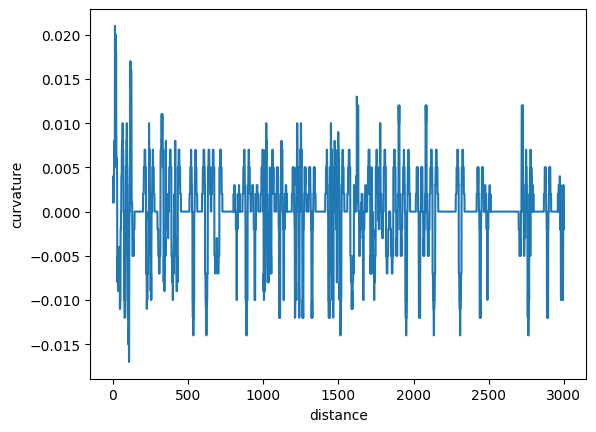

In [ ]:
sns.lineplot(data=s30, x='distance', y='curvature')
plt.show()

**곡률 데이터**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


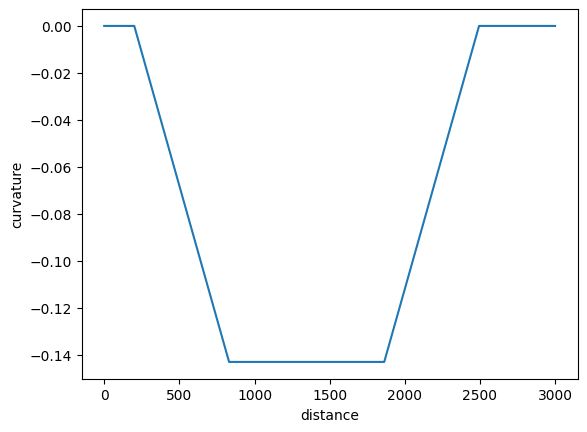

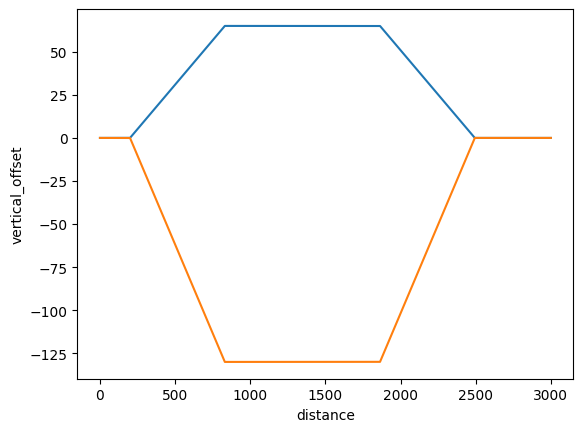

In [ ]:
sns.lineplot(data=c30,x='distance',y='curvature')
plt.show()

sns.lineplot(data=c30,x='distance',y='vertical_offset')
sns.lineplot(data=c30,x='distance',y='cross_level_offset')
plt.show()

# c30.loc[(c30.curvature==0) & (c30.distance<2500)].distance.tolist()

# distance 0~200

In [ ]:
dat_lst['lane_data_columns']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,type,name,description
0,curve,Distance,거리[m]
1,curve,Curvature,곡률[1/km]
2,curve,Vertical offset,선로중심부 높이[mm]
3,curve,Cross level offset,캔트[mm]
4,straight,Distance,거리[m]
5,straight,Cross level irregularity,우측 선로에 대한 좌측 선로 높이차(캔트) 불규칙도[mm]
6,straight,Curvature irregularity,곡선에 대한 불규칙도[1/km]
7,straight,Lateral irregularity,수평 불규칙도[mm]
8,straight,Vertical irregularity,수직 불규칙도[mm]
9,straight,Gauge variation,선로 게이지(좌우거리차이) 불규칙도[mm]


      distance  curvature  vertical_offset  cross_level_offset  a_m1_c_b1_y  \
3320    830.00     -0.143             65.0              -130.0      -1.1140   
3321    830.25     -0.143             65.0              -130.0      -1.1010   
3322    830.50     -0.143             65.0              -130.0      -1.0830   
3323    830.75     -0.143             65.0              -130.0      -1.0600   
3324    831.00     -0.143             65.0              -130.0      -1.0350   
...        ...        ...              ...                 ...          ...   
7448   1862.00     -0.143             65.0              -130.0      -0.4733   
7449   1862.25     -0.143             65.0              -130.0      -0.5052   
7450   1862.50     -0.143             65.0              -130.0      -0.5459   
7451   1862.75     -0.143             65.0              -130.0      -0.5929   
7452   1863.00     -0.143             65.0              -130.0      -0.6413   

      a_m1_c_b1_z  a_m1_b1_w1_y_l  a_m1_b1_bc_y_l  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='distance', ylabel='curvature'>

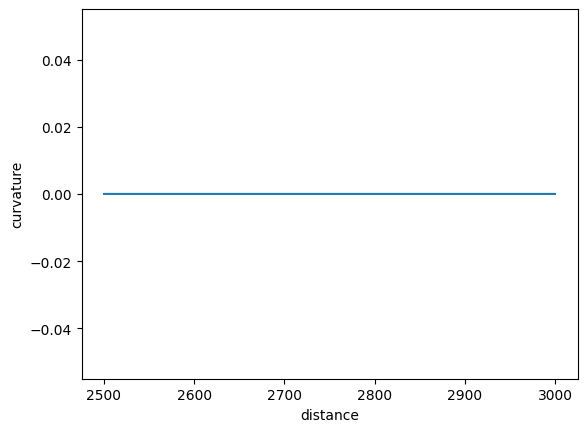

In [ ]:
print(c30.loc[c30.cross_level_offset==c30.cross_level_offset.min()])

c30.loc[c30.vertical_offset==c30.vertical_offset.min()]

# sns.lineplot(c30.loc[c30.distance>2500],x='distance',y='curvature')



*   curvature 0(max)인 distance 구간: 0-200, 2493-2500
*   curvature -0.143(min)인 distance 구간: 830-1863

* ㅇㅇㅇㅇㄴ



In [ ]:
temp = dc(dat_lst['data_c30'])
temp['yl_m1_b1_w1'].shift(40)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0     0.001366
1     0.007337
2     0.011998
3     0.008566
4     0.002605
5    -0.000328
6    -0.002607
7    -0.002466
8    -0.004316
9    -0.007357
10   -0.007692
11   -0.005619
12   -0.000155
13    0.006525
14    0.013237
15    0.016736
16    0.014275
17    0.007999
18   -0.001376
19   -0.011567
20   -0.020811
21   -0.021246
22   -0.015073
23   -0.010759
24   -0.011260
25   -0.008542
26   -0.000362
27    0.005592
28    0.004731
29    0.002275
30    0.002167
31    0.003612
32    0.006699
33    0.006579
34    0.009301
35    0.014380
36    0.020005
37    0.022511
38    0.014929
39    0.001631
40   -0.011246
41   -0.015771
42   -0.016588
43   -0.014160
44   -0.009131
45   -0.002735
46    0.002563
47    0.006855
48    0.014157
49    0.025297
Name: yl_m1_b1_w1, dtype: float64

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

# pd.read_csv('answer_sample.csv')

def lgbm_best_params(type='c',dist_lag=10): # curve/straight, distance lag (meter)

  type_lst = ['data_'+type+i for i in ['30','40','50','70','100']]
  return_params_lst = {}

  for tp in type_lst:
    print(tp, end=" => ")
    best_params_lst = []
    dat_train = dat_lst[tp].iloc[:10001]

    # dist_lag = 10 # meter

    time_lag = dist_lag*4
    dat_train['yl_m1_b1_w1_lag'] = dat_lst[tp].loc[:,['yl_m1_b1_w1']].shift(time_lag)
    dat_train['yr_m1_b1_w1_lag'] = dat_lst[tp].loc[:,['yr_m1_b1_w1']].shift(time_lag)
    dat_train['yl_m1_b1_w2_lag'] = dat_lst[tp].loc[:,['yl_m1_b1_w2']].shift(time_lag)
    dat_train['yr_m1_b1_w2_lag'] = dat_lst[tp].loc[:,['yr_m1_b1_w2']].shift(time_lag)

    params = {
        'n_estimators':[100,300,500],
        'learning_rate':[.1, .05, .01],
        'colsample_bytree':[1,.8],
        # 'max_depth':[5,7]
    }

    lgb_ = lgb.LGBMRegressor()

    for i in ['yl_m1_b1_w1','yr_m1_b1_w1','yl_m1_b1_w2','yr_m1_b1_w2']:
      print(i, end=" ")
      random_lgb = RandomizedSearchCV(lgb_, params, random_state=42, cv=5, n_iter=30, n_jobs=-1, scoring='neg_mean_squared_error')
      random_lgb.fit(dat_train.drop(['yl_m1_b1_w1','yr_m1_b1_w1','yl_m1_b1_w2','yr_m1_b1_w2'],axis=1),dat_train[i])
      best_params_lst.append(random_lgb.best_params_)

    print('finish !!\n')

    return_params_lst[tp] = best_params_lst

  return return_params_lst

# lgbm_res_c = lgbm_best_params(type='c',dist_lag=10)
lgbm_res_s = lgbm_best_params(type='s',dist_lag=10)
lgbm_res_s

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


data_s30 => yl_m1_b1_w1 [LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002914 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8925
[LightGBM] [Info] Number of data points in the train set: 10001, number of used features: 35
[LightGBM] [Info] Start training from score 0.006688
yr_m1_b1_w1 [LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005320 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8925
[LightGBM] [Info] Number of data points in the train set: 10001, number of used features: 35
[LightGBM] [Info] Start training from score 0.006555
yl_m1_b1_w2 [LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8925
[LightGBM] [Info] Number of data points in the train set: 10001

{'data_s30': [{'n_estimators': 300,
   'learning_rate': 0.05,
   'colsample_bytree': 0.8},
  {'n_estimators': 500, 'learning_rate': 0.1, 'colsample_bytree': 1},
  {'n_estimators': 500, 'learning_rate': 0.1, 'colsample_bytree': 0.8},
  {'n_estimators': 500, 'learning_rate': 0.1, 'colsample_bytree': 1}],
 'data_s40': [{'n_estimators': 500,
   'learning_rate': 0.05,
   'colsample_bytree': 0.8},
  {'n_estimators': 500, 'learning_rate': 0.05, 'colsample_bytree': 1},
  {'n_estimators': 500, 'learning_rate': 0.05, 'colsample_bytree': 0.8},
  {'n_estimators': 500, 'learning_rate': 0.1, 'colsample_bytree': 1}],
 'data_s50': [{'n_estimators': 300,
   'learning_rate': 0.05,
   'colsample_bytree': 0.8},
  {'n_estimators': 500, 'learning_rate': 0.05, 'colsample_bytree': 0.8},
  {'n_estimators': 500, 'learning_rate': 0.05, 'colsample_bytree': 0.8},
  {'n_estimators': 500, 'learning_rate': 0.05, 'colsample_bytree': 0.8}],
 'data_s70': [{'n_estimators': 500,
   'learning_rate': 0.05,
   'colsample_byt

In [ ]:
lgbm_res = {'data_c30': [{'n_estimators': 500,
   'learning_rate': 0.05,
   'colsample_bytree': 0.08},
  {'n_estimators': 100, 'learning_rate': 0.1, 'colsample_bytree': 1},
  {'n_estimators': 500, 'learning_rate': 0.1, 'colsample_bytree': 1},
  {'n_estimators': 500, 'learning_rate': 0.1, 'colsample_bytree': 0.08}],
 'data_c40': [{'n_estimators': 500,
   'learning_rate': 0.05,
   'colsample_bytree': 0.08},
  {'n_estimators': 500, 'learning_rate': 0.1, 'colsample_bytree': 0.08},
  {'n_estimators': 500, 'learning_rate': 0.05, 'colsample_bytree': 1},
  {'n_estimators': 500, 'learning_rate': 0.05, 'colsample_bytree': 1}],
 'data_c50': [{'n_estimators': 500,
   'learning_rate': 0.05,
   'colsample_bytree': 0.08},
  {'n_estimators': 500, 'learning_rate': 0.1, 'colsample_bytree': 0.08},
  {'n_estimators': 500, 'learning_rate': 0.1, 'colsample_bytree': 1},
  {'n_estimators': 500, 'learning_rate': 0.05, 'colsample_bytree': 1}],
 'data_c70': [{'n_estimators': 500,
   'learning_rate': 0.1,
   'colsample_bytree': 0.08},
  {'n_estimators': 500, 'learning_rate': 0.1, 'colsample_bytree': 0.08},
  {'n_estimators': 500, 'learning_rate': 0.05, 'colsample_bytree': 1},
  {'n_estimators': 500, 'learning_rate': 0.05, 'colsample_bytree': 1}],
 'data_c100': [{'n_estimators': 500,
   'learning_rate': 0.1,
   'colsample_bytree': 0.08},
  {'n_estimators': 500, 'learning_rate': 0.1, 'colsample_bytree': 0.08},
  {'n_estimators': 500, 'learning_rate': 0.05, 'colsample_bytree': 1},
  {'n_estimators': 500, 'learning_rate': 0.05, 'colsample_bytree': 1}]}



최적 파라미터 중 최빈 조합 찾기

In [ ]:
from collections import Counter
# temp = pd.DataFrame(lgbm_res['data_c30']+lgbm_res['data_c40']+lgbm_res['data_c50']+lgbm_res['data_c70']+lgbm_res['data_c100'])
temp = pd.DataFrame(lgbm_res_s['data_s30']+lgbm_res_s['data_s40']+lgbm_res_s['data_s50']+lgbm_res_s['data_s70']+lgbm_res_s['data_s100'])
temp['cnt'] = 1
temp.groupby(['n_estimators','learning_rate','colsample_bytree']).sum()

cnt
n_estimators learning_rate colsample_bytree     
300          0.05          0.8                 3
500          0.05          0.8                11
                           1.0                 1
             0.10          0.8                 2
                           1.0                 3

예측 시행 (distance lag: 10m)

In [ ]:
dat_lst['data_c30']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  getpass.getpass = self._save_getpass


,distance,a_m1_c_b1_y,a_m1_c_b1_z,a_m1_b1_w1_y_l,a_m1_b1_bc_y_l,a_m1_b1_w2_y_l,a_m1_b1_w1_y_r,a_m1_b1_bc_y_r,a_m1_b1_w2_y_r,a_m1_b1_w1_z_l,...,ql_m1_b1_w1,qr_m1_b1_w1,v_m1_b1_w2_l,v_m1_b1_w2_r,ql_m1_b1_w2,qr_m1_b1_w2,yl_m1_b1_w1,yr_m1_b1_w1,yl_m1_b1_w2,yr_m1_b1_w2
0,0.00,-1.273400e-09,-1.943500e-08,0.022194,0.022194,0.022194,0.022194,0.022194,0.022194,-0.055737,...,-0.305900,0.354800,0.000832,0.000847,0.000012,0.000012,0.001366,0.001558,0.001412,0.001406
1,0.25,1.485600e-05,3.403000e-06,0.161500,0.159800,0.158200,0.161500,0.159800,0.158200,-0.369500,...,-0.086214,0.088455,-0.010882,0.012985,-0.000163,0.000191,0.007337,-0.004638,0.001448,0.001525
2,0.50,2.706500e-04,5.112900e-05,0.579500,0.569500,0.559500,0.579500,0.569500,0.559500,-1.329000,...,-0.085584,0.082844,-0.008447,0.010115,-0.000127,0.000149,0.011998,-0.009334,0.001715,0.001607
3,0.75,1.247900e-03,1.295900e-04,0.812000,0.789500,0.767100,0.811800,0.789300,0.766900,-2.511000,...,-0.249400,-0.187700,0.153500,-0.153900,0.002307,-0.002261,0.008566,-0.005116,0.002410,0.001200
4,1.00,3.080900e-03,-1.466900e-03,0.383100,0.349700,0.316300,0.382700,0.349300,0.315900,-5.545000,...,-0.289500,-0.268300,0.630800,-0.630400,0.009477,-0.009258,0.002605,0.001091,0.003430,0.000351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,2998.75,8.982300e-02,8.510300e-02,-1.100000,-1.016000,-0.931900,-1.102000,-1.018000,-0.933300,10.420000,...,0.213300,0.102600,-9.153000,-17.960000,-0.137500,-0.263800,0.000000,0.000000,0.000000,0.000000
11996,2999.00,1.039000e-01,9.337700e-02,-0.937900,0.046609,1.031000,-0.938500,0.045991,1.030000,5.915000,...,0.154400,0.051214,-7.990000,-22.870000,-0.120000,-0.335900,0.000000,0.000000,0.000000,0.000000
11997,2999.25,1.147000e-01,7.847700e-02,-0.403500,1.246000,2.896000,-0.403100,1.247000,2.897000,0.460500,...,0.099015,0.148700,-10.750000,-30.460000,-0.161600,-0.447300,0.000000,0.000000,0.000000,0.000000
11998,2999.50,1.234000e-01,4.075700e-02,-0.313900,1.483000,3.280000,-0.312900,1.484000,3.281000,-0.782000,...,0.001208,0.151700,-16.270000,-34.710000,-0.244400,-0.509800,0.000000,0.000000,0.000000,0.000000


In [ ]:
gc.collect()

import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

def lgbm_predict(type='c',dist_lag=10, param=None): # curve/straight, distance lag (meter)

  type_lst = ['data_'+type+i for i in ['30','40','50','70','100']]
  return_dat = []

  for tp in type_lst:
    print(tp, end=" => ")

    dat_train = dat_lst[tp].iloc[:10001]

    time_lag = 10*4
    dat_train['yl_m1_b1_w1_lag'] = dat_lst[tp].loc[:,['yl_m1_b1_w1']].shift(time_lag)
    dat_train['yr_m1_b1_w1_lag'] = dat_lst[tp].loc[:,['yr_m1_b1_w1']].shift(time_lag)
    dat_train['yl_m1_b1_w2_lag'] = dat_lst[tp].loc[:,['yl_m1_b1_w2']].shift(time_lag)
    dat_train['yr_m1_b1_w2_lag'] = dat_lst[tp].loc[:,['yr_m1_b1_w2']].shift(time_lag)

    lgb_ = lgb.LGBMRegressor(n_estimators=param['n_estimators'],learning_rate=param['learning_rate'],colsample_bytree=param['colsample_bytree'],random_state=42,force_col_wise=True)
    lgb_2 = dc(lgb_); lgb_3 = dc(lgb_); lgb_4 = dc(lgb_)
    pred_set = dat_lst[tp].iloc[10000:]
    pred_set['yl_m1_b1_w1_lag'] = dat_lst[tp].loc[:,['yl_m1_b1_w1']].shift(time_lag).iloc[10000:]
    pred_set['yr_m1_b1_w1_lag'] = dat_lst[tp].loc[:,['yr_m1_b1_w1']].shift(time_lag).iloc[10000:]
    pred_set['yl_m1_b1_w2_lag'] = dat_lst[tp].loc[:,['yl_m1_b1_w2']].shift(time_lag).iloc[10000:]
    pred_set['yr_m1_b1_w2_lag'] = dat_lst[tp].loc[:,['yr_m1_b1_w2']].shift(time_lag).iloc[10000:]

    output_ = ['yl_m1_b1_w1','yr_m1_b1_w1','yl_m1_b1_w2','yr_m1_b1_w2']
    lgb_.fit(dat_train.drop(output_,axis=1), dat_train[output_[0]])
    lgb_2.fit(dat_train.drop(output_,axis=1), dat_train[output_[1]])
    lgb_3.fit(dat_train.drop(output_,axis=1), dat_train[output_[2]])
    lgb_4.fit(dat_train.drop(output_,axis=1), dat_train[output_[3]])
    lgb_lst = [lgb_, lgb_2, lgb_3, lgb_4]

    for i in range(0,2000,time_lag):
      for j in range(4):
        x_test = pred_set.iloc[i:(i+time_lag)].drop(output_,axis=1)
        y_test = lgb_lst[j].predict(x_test)
        pred_set.loc[pred_set.distance.isin(pred_set.iloc[i:(i+time_lag)].distance),output_[j]] = y_test
        if i+time_lag < 2000:
          pred_set.iloc[(i+time_lag):(i+time_lag*2)][output_[j]+"_lag"] = y_test

    print("finish !!\n")

    return_set = pred_set.iloc[1:].loc[:,output_]
    return_set.columns = [st.upper()+tp[4:] for st in return_set.columns.values]
    return_dat.append(return_set)

  return pd.concat(return_dat,axis=1)

#######################################################
params = {
  'n_estimators':500,
  'learning_rate':.05,
  'colsample_bytree':.8
}

# dat = lgbm_predict(type='c', dist_lag=10, param=params)
dat = lgbm_predict(type='s', dist_lag=10, param=params)
dat

data_s30 => [LightGBM] [Info] Total Bins 8925
[LightGBM] [Info] Number of data points in the train set: 10001, number of used features: 35
[LightGBM] [Info] Start training from score 0.006688
[LightGBM] [Info] Total Bins 8925
[LightGBM] [Info] Number of data points in the train set: 10001, number of used features: 35
[LightGBM] [Info] Start training from score 0.006555
[LightGBM] [Info] Total Bins 8925
[LightGBM] [Info] Number of data points in the train set: 10001, number of used features: 35
[LightGBM] [Info] Start training from score 0.005504
[LightGBM] [Info] Total Bins 8925
[LightGBM] [Info] Number of data points in the train set: 10001, number of used features: 35
[LightGBM] [Info] Start training from score 0.005077
finish !!

data_s40 => [LightGBM] [Info] Total Bins 8925
[LightGBM] [Info] Number of data points in the train set: 10001, number of used features: 35
[LightGBM] [Info] Start training from score 0.005023
[LightGBM] [Info] Total Bins 8925
[LightGBM] [Info] Number of dat

,YL_M1_B1_W1_s30,YR_M1_B1_W1_s30,YL_M1_B1_W2_s30,YR_M1_B1_W2_s30,YL_M1_B1_W1_s40,YR_M1_B1_W1_s40,YL_M1_B1_W2_s40,YR_M1_B1_W2_s40,YL_M1_B1_W1_s50,YR_M1_B1_W1_s50,YL_M1_B1_W2_s50,YR_M1_B1_W2_s50,YL_M1_B1_W1_s70,YR_M1_B1_W1_s70,YL_M1_B1_W2_s70,YR_M1_B1_W2_s70,YL_M1_B1_W1_s100,YR_M1_B1_W1_s100,YL_M1_B1_W2_s100,YR_M1_B1_W2_s100
10001,0.033597,0.000499,0.045080,-0.032764,0.005687,0.003924,-0.013901,0.022906,0.012147,0.002770,-0.006887,0.017511,0.013100,0.007505,-0.004030,0.012667,0.013892,0.006230,-0.004717,0.018849
10002,0.029059,0.000353,0.049462,-0.034119,0.000643,0.006283,-0.010687,0.017554,0.007406,0.007100,0.000070,0.015689,0.006906,0.010479,-0.001707,0.007403,0.006627,0.007552,-0.000473,0.008037
10003,0.019173,0.002378,0.052843,-0.041904,-0.004841,0.015974,-0.006102,0.011550,-0.003388,0.015667,0.005573,0.001656,-0.007149,0.015597,0.008188,-0.002526,-0.005587,0.016146,0.009117,0.003082
10004,0.019194,0.002591,0.061499,-0.040287,-0.010618,0.021426,-0.002316,0.010569,-0.014037,0.023734,0.011872,-0.001803,-0.008358,0.022551,0.012839,-0.002920,-0.012083,0.023065,0.017821,-0.004109
10005,0.016272,0.001483,0.064347,-0.046959,-0.018086,0.026933,0.005721,0.003015,-0.019108,0.029375,0.023333,-0.007187,-0.018660,0.027314,0.021728,-0.013135,-0.020316,0.028709,0.020193,-0.011115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.016910,-0.006187,0.050960,-0.033086,0.014740,-0.007151,0.040403,-0.024515,0.014695,-0.006094,0.040692,-0.027493,0.019974,-0.008538,0.038478,-0.025821,0.018441,-0.008843,0.037313,-0.026457
11996,0.008071,0.002442,0.032404,-0.019765,0.009644,-0.003386,0.032652,-0.024117,0.009602,-0.004041,0.032628,-0.021672,0.009686,-0.003194,0.030097,-0.021102,0.010130,-0.003167,0.031158,-0.023058
11997,0.005277,0.004960,0.032689,-0.012138,0.005237,-0.000018,0.020836,-0.013944,0.007068,-0.000515,0.017733,-0.006568,0.009816,0.000021,0.019751,-0.009547,0.007211,0.000328,0.023086,-0.008186
11998,0.009442,-0.002989,0.013110,0.002820,0.008022,0.000194,0.004965,-0.000049,0.010264,0.000818,0.004040,0.003398,0.010143,0.000384,0.007280,0.004006,0.010423,0.000775,0.008589,0.002590


In [ ]:
dat2 = pd.concat( [pd.DataFrame({'Distance':np.arange(2500.25,3000,0.25)}), dat.reset_index(drop=True)], axis=1)
dat2.to_csv('lgbm_s.csv',index=None)

In [ ]:
temp = pd.concat([dat2,pd.read_csv('lgbm_c.csv')], axis=1)
# temp.to_csv('lgbm_predict.csv', index=None)
temp

sample = pd.read_csv('answer_sample.csv')
sample.columns.values == temp.columns.values
print(temp.shape)
print(sample.shape)

temp.dtypes

(1999, 41)
(1999, 41)


Distance            float64
YL_M1_B1_W1_s30     float64
YR_M1_B1_W1_s30     float64
YL_M1_B1_W2_s30     float64
YR_M1_B1_W2_s30     float64
YL_M1_B1_W1_s40     float64
YR_M1_B1_W1_s40     float64
YL_M1_B1_W2_s40     float64
YR_M1_B1_W2_s40     float64
YL_M1_B1_W1_s50     float64
YR_M1_B1_W1_s50     float64
YL_M1_B1_W2_s50     float64
YR_M1_B1_W2_s50     float64
YL_M1_B1_W1_s70     float64
YR_M1_B1_W1_s70     float64
YL_M1_B1_W2_s70     float64
YR_M1_B1_W2_s70     float64
YL_M1_B1_W1_s100    float64
YR_M1_B1_W1_s100    float64
YL_M1_B1_W2_s100    float64
YR_M1_B1_W2_s100    float64
YL_M1_B1_W1_c30     float64
YR_M1_B1_W1_c30     float64
YL_M1_B1_W2_c30     float64
YR_M1_B1_W2_c30     float64
YL_M1_B1_W1_c40     float64
YR_M1_B1_W1_c40     float64
YL_M1_B1_W2_c40     float64
YR_M1_B1_W2_c40     float64
YL_M1_B1_W1_c50     float64
YR_M1_B1_W1_c50     float64
YL_M1_B1_W2_c50     float64
YR_M1_B1_W2_c50     float64
YL_M1_B1_W1_c70     float64
YR_M1_B1_W1_c70     float64
YL_M1_B1_W2_c70     

**LSTM**

In [ ]:
dat_lst['data_c30'].shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  getpass.getpass = self._save_getpass


(12000, 35)

**데이터 구성**

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as f
from torch.utils.data import DataLoader, TensorDataset
import torch.optim.adamw as adamw

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error


batch_size = 1
output_size = 8  # 출력 특성의 수: (output_size/4) meter 마다 탈선계수 도출
dist_lag = 2 # want to make (dist_lag) meters lag
seq_len = 64 # time sequence length

class train_test_split():
  def __init__(self, dist_lag, seq_len, data_lst, name_y, batch_size):
    super(train_test_split, self).__init__()
    self.dist_lag = dist_lag
    self.dat_lst = dc(data_lst)
    self.train_lst = dc(data_lst)
    self.test_lst = dc(data_lst)
    self.name_y = name_y
    self.batch_size = batch_size

    # for ts_format
    self.ts_train_lst = []
    self.ts_test_lst = []
    self.seq_len = seq_len
    self.n_feature = 0
    self.num_samples = 0

  def train_data(self): # curve/straight, distance lag (meter)

    type_ = ['c','s']
    for tp in type_:
      type_lst = ['data_'+tp+i for i in ['30','40','50','70','100']]

      for tl in type_lst:
        # dat_train = self.dat_lst[tl].iloc[:10001]
        # dat_test = self.dat_lst[tl].iloc[10001:]

        # scaling train_x, train_y
        scaler_ = MinMaxScaler()
        temp = dc(self.dat_lst[tl])

        # 선로 정보 merge
        if tp=="c":
          temp = pd.merge(self.dat_lst['lane_data_c'],temp,on='distance',how='right')

        else:
          temp = pd.merge(self.dat_lst['lane_data_s'],temp,on='distance',how='right')

        temp_join = dc(temp)
        temp = temp.iloc[:10001].iloc[:,:-4]
        scaler_.fit(temp)
        dat_scaled = scaler_.transform(temp)
        dat_scaled = pd.DataFrame(temp_join.iloc[:,:-4], columns=temp_join.columns.values[:-4])
        dat_scaled = pd.concat([dat_scaled,temp_join[self.name_y]], axis=1)

        time_lag = self.dist_lag*4
        dat_scaled['y_lag'] = dat_scaled[self.name_y].shift(time_lag)
        dat_scaled = dat_scaled.loc[~dat_scaled.y_lag.isna()]

        input_size = dat_scaled.shape[1]
        print(input_size)
        ts_train_x = []
        ts_train_y = []
        ts_test_x = []

        # train set -> set to time series format
        for i in range(0,10000 - self.seq_len-time_lag, time_lag):
          ts_train_x.append( dat_scaled.iloc[i:(i+self.seq_len)] )
          ts_train_y.append( dat_scaled.iloc[(i+self.seq_len):(i+self.seq_len+time_lag)][self.name_y])
        for i in range(10000 - self.seq_len-time_lag,12000 - self.seq_len-time_lag,time_lag):
          ts_test_x.append( dat_scaled.iloc[i:(i+self.seq_len)] )

        self.train_lst[tl] = DataLoader(
            TensorDataset(torch.tensor(np.array(ts_train_x), dtype=torch.double), torch.tensor(np.array(ts_train_y), dtype=torch.double)), batch_size=self.batch_size, shuffle=False)
        temp = np.array(ts_test_x)
        # print(np.array(ts_train_x).shape)
        # print(np.array(ts_train_y).shape)
        # print(temp.shape)
        self.test_lst[tl] = DataLoader( TensorDataset(torch.tensor(np.array(ts_test_x), dtype=torch.float)) , batch_size=self.batch_size, shuffle=False)

    return self.train_lst, self.test_lst

l1 = train_test_split(dist_lag,seq_len,dat_lst,"yl_m1_b1_w1",batch_size)
r1 = train_test_split(dist_lag,seq_len,dat_lst,"yr_m1_b1_w1",batch_size)
l2 = train_test_split(dist_lag,seq_len,dat_lst,"yl_m1_b1_w2",batch_size)
r2 = train_test_split(dist_lag,seq_len,dat_lst,"yr_m1_b1_w2",batch_size)

l1_train, l1_test = l1.train_data()
l2_train, l2_test = l2.train_data()
r1_train, r1_test = r1.train_data()
r2_train, r2_test = r2.train_data()





/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  getpass.getpass = self._save_getpass


36
36
36
36
36
38
38
38
38
38
36
36
36
36
36
38
38
38
38
38
36
36
36
36
36
38
38
38
38
38
36
36
36
36
36
38
38
38
38
38


**Multivariate GRU 구성**

In [6]:
from unicodedata import bidirectional
input_size = 36
hidden_size = 16
output_size = 8
num_layers = 2  # GRU 층의 개수
# device = torch.device("cuda")
device = torch.device("cpu")

class MultivariateGRU(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, seq_len, output_size,bidirectional=False):
    super(MultivariateGRU, self).__init__()
    self.hidden_size = hidden_size
    self.input_size = output_size
    self.output_size = output_size
    self.num_layers = num_layers
    self.seq_len = seq_len
    self.hidden_state = None
    self.b_bd = bidirectional
    self.int_bd = 1+int(self.b_bd)

    self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True, bidirectional=self.b_bd)
    self.fc = nn.Linear(self.hidden_size, output_size)

  def forward(self, x):
    if self.hidden_state is None:
      self.hidden_state = torch.zeros(self.int_bd*self.num_layers, x.size(0), self.hidden_size, dtype=torch.float).to(x.device)

    out, hid = self.gru(x, self.hidden_state.detach())
    # hid = self.fc(hid[self.num_layers-1]).flatten()
    if self.b_bd:
      out = (out[:,:,:self.hidden_size]+out[:,:,self.hidden_size:])/2
    out = self.fc(out[:,-1,:]).flatten()
    return out


# 모델 인스턴스 생성
model = MultivariateGRU(input_size, hidden_size, num_layers, seq_len, output_size,True)
model.to(device)

# 모델 확인
print(model)

# 손실 함수와 최적화 알고리즘 설정
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)

# 모델 학습 및 예측
num_epochs = 100
plot_idx = 10

def train_pred_model(num_epoch, train_lst, test_lst, model,dat_nm):
  # train model
  for epoch in range(num_epochs):
    pred=[]; real=[]
    for train_x, train_y in train_lst[dat_nm]:
      torch.manual_seed(42)
      optimizer.zero_grad()

      # 모델에 데이터 전달
      predictions = model(train_x.float().to(device))
      # 손실 계산
      loss = criterion(predictions, train_y.float().flatten().to(device))

      # 역전파 및 가중치 갱신
      loss.backward()
      optimizer.step()

      if epoch % plot_idx == plot_idx-1:
        pred.append(predictions.tolist()[0])
        real.append(train_y.float().flatten().tolist()[0])

    if epoch % plot_idx == plot_idx-1:
      plt_dat = pd.DataFrame({'pred':pred,'real':real})
      plt_dat['x'] = np.arange(0,plt_dat.shape[0])
      sns.lineplot(plt_dat,x='x',y='real',alpha=.5,label='train_y')
      sns.lineplot(plt_dat,x='x',y='pred',alpha=.5,label='pred')
      plt.show()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

  # predict model
  model.eval()
  with torch.no_grad():
    cnt = 0
    output_tensor = torch.tensor(0)
    for test_x in test_lst[dat_nm]:
      test_x = test_x[0]
      if cnt>0:
        # y value
        if cnt*dist_lag*4 < seq_len:
          test_x[:,-min(seq_len,cnt*dist_lag*4):,-2] = torch.Tensor(output_tensor[:min(cnt*dist_lag*4, seq_len)]).float()
        else:
          test_x[:,:,-2] = output_tensor[-seq_len:]
        # y lag
        if cnt*dist_lag*4 > output_size:
          test_x[:,-min(cnt*dist_lag*4-output_size, seq_len):,-1] = output_tensor[-seq_len:][-min(cnt*dist_lag*4-output_size, seq_len):].float()

      output = model(test_x.float().to(device))
      if cnt==0:
        output_tensor = dc(output)
      else:
        output_tensor = torch.concat([output_tensor,output],axis=0)
      cnt += 1

  return output_tensor

######## 결과 출력
output_ = ['yl_m1_b1_w1','yr_m1_b1_w1','yl_m1_b1_w2','yr_m1_b1_w2']

cnt = 0
type_ = ['c','s']
for nm in output_:
  for tp in type_:
    type_lst = ['data_'+tp+i for i in ['30','40','50','70','100']]
    for tl in type_lst:
      print(tl,nm, 'start !!!!')

      if cnt > 2:
        model = MultivariateGRU(input_size, hidden_size, num_layers, seq_len, output_size,True)
        model.to(device)
        optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)

        if nm == "yl_m1_b1_w1": pred_ = train_pred_model(num_epochs, l1_train, l1_test, model,tl)
        elif nm == "yr_m1_b1_w1": pred_ = train_pred_model(num_epochs, r1_train, r1_test, model,tl)
        elif nm == "yl_m1_b1_w2": pred_ = train_pred_model(num_epochs, l2_train, l2_test, model,tl)
        else: pred_ = train_pred_model(num_epochs, r2_train, r2_test, model,tl)

        pred_dat = pd.DataFrame({'Distance':np.arange(2500.25,3000,0.25),'pred':pred_.to('cpu').tolist()[1:]})
        pred_dat.columns.values[1] = nm.upper() + tl[4:]
        pred_dat.to_csv('gru/gru_'+tl+"_"+nm+".csv",index=None)

      print(tl,nm, 'end !!!!\n\n')
      cnt+=1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  getpass.getpass = self._save_getpass


MultivariateGRU(
  (gru): GRU(36, 16, num_layers=2, batch_first=True, bidirectional=True)
  (fc): Linear(in_features=16, out_features=8, bias=True)
)
data_c30 yl_m1_b1_w1 start !!!!
data_c30 yl_m1_b1_w1 end !!!!


data_c40 yl_m1_b1_w1 start !!!!
data_c40 yl_m1_b1_w1 end !!!!


data_c50 yl_m1_b1_w1 start !!!!
data_c50 yl_m1_b1_w1 end !!!!


data_c70 yl_m1_b1_w1 start !!!!
Epoch [1/100], Loss: 0.0003


KeyboardInterrupt: ignored

In [ ]:
# pred_ = train_pred_model(num_epochs, l1_train, l1_test, model,tl)
pred_dat = pd.DataFrame({'Distance':np.arange(2500.25,3000,0.25),'pred':pred_.to('cpu').tolist()[1:]})
pred_dat.columns.values[1] = ['yl_m1_b1_w1','yr_m1_b1_w1','yl_m1_b1_w2','yr_m1_b1_w2'][0].upper() + ""
pred_dat

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  getpass.getpass = self._save_getpass


,Distance,YL_M1_B1_W1
0,2500.25,0.015352
1,2500.50,0.019303
2,2500.75,0.024844
3,2501.00,0.027570
4,2501.25,0.028761
...,...,...
1994,2998.75,0.024468
1995,2999.00,0.027203
1996,2999.25,0.028327
1997,2999.50,0.026275


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  getpass.getpass = self._save_getpass


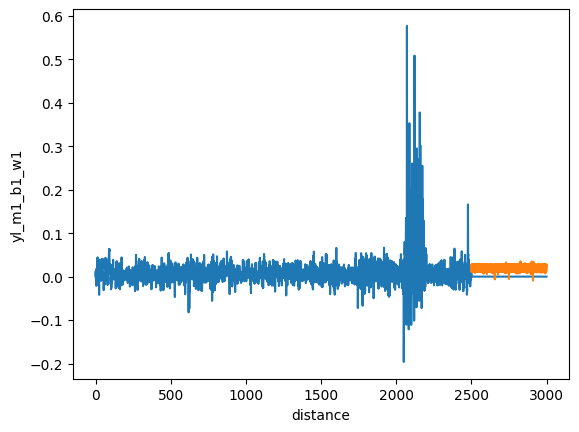

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.lineplot(data=dat_lst['data_c30'],y='yl_m1_b1_w1',x='distance')
sns.lineplot(y=pred_.to('cpu').numpy(),x=dat_lst['data_c30'].distance.iloc[10000:])
plt.show()

**(실험) 한 모델에서 모든 output 동시 모델링 진행**

In [ ]:
np.array([[1,2,3],[4,5,6]])[:,-1:]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  getpass.getpass = self._save_getpass


array([[3],
       [6]])

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as f
from torch.utils.data import DataLoader, TensorDataset
import torch.optim.adamw as adamw

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error


batch_size = 1
output_size = 8  # 출력 특성의 수: (output_size/4) meter 마다 탈선계수 도출
dist_lag = 2 # want to make (dist_lag) meters lag
seq_len = 64 # time sequence length

class train_test_split_batch():
  def __init__(self, dist_lag, seq_len, data_lst, batch_size):
    super(train_test_split_batch, self).__init__()
    self.dist_lag = dist_lag
    self.dat_lst = dc(data_lst)
    self.train_lst = dc(data_lst)
    self.test_lst = dc(data_lst)
    # self.name_y = name_y
    self.batch_size = batch_size

    # for ts_format
    self.ts_train_lst = []
    self.ts_test_lst = []
    self.seq_len = seq_len
    self.n_feature = 0
    self.num_samples = 0

  def train_data(self): # curve/straight, distance lag (meter)

    type_ = ['c','s']
    output_ = ['yl_m1_b1_w1','yr_m1_b1_w1','yl_m1_b1_w2','yr_m1_b1_w2']

    for tp in type_:
      type_lst = ['data_'+tp+i for i in ['30','40','50','70','100']]

      for tl in type_lst:
        # dat_train = self.dat_lst[tl].iloc[:10001]
        # dat_test = self.dat_lst[tl].iloc[10001:]

        # scaling train_x, train_y
        scaler_ = MinMaxScaler()
        temp = dc(self.dat_lst[tl])

        # 선로 정보 merge
        if tp=="c":
          temp = pd.merge(self.dat_lst['lane_data_c'],temp,on='distance',how='right')

        else:
          temp = pd.merge(self.dat_lst['lane_data_s'],temp,on='distance',how='right')

        temp_join = dc(temp)
        temp = temp.iloc[:10001].iloc[:,:-4]
        scaler_.fit(temp)
        dat_scaled = scaler_.transform(temp)
        dat_scaled = pd.DataFrame(temp_join.iloc[:,:-4], columns=temp_join.columns.values[:-4])
        dat_scaled = pd.concat([dat_scaled,temp_join[output_]], axis=1)

        time_lag = self.dist_lag*4
        dat_scaled['y1_lag'] = dat_scaled[output_[0]].shift(time_lag)
        dat_scaled['y2_lag'] = dat_scaled[output_[1]].shift(time_lag)
        dat_scaled['y3_lag'] = dat_scaled[output_[2]].shift(time_lag)
        dat_scaled['y4_lag'] = dat_scaled[output_[3]].shift(time_lag)
        dat_scaled = dat_scaled.loc[~dat_scaled.y1_lag.isna()]

        input_size = dat_scaled.shape[1]
        print(input_size)
        ts_train_x = []
        ts_train_y = []
        ts_test_x = []

        # train set -> set to time series format
        for i in range(0,10000 - self.seq_len-time_lag, time_lag):
          ts_train_x.append( dat_scaled.iloc[i:(i+self.seq_len)] )
          ts_train_y.append( dat_scaled.iloc[(i+self.seq_len):(i+self.seq_len+time_lag)][output_].T)
        for i in range(10000 - self.seq_len-time_lag,12000 - self.seq_len-time_lag,time_lag):
          ts_test_x.append( dat_scaled.iloc[i:(i+self.seq_len)] )

        # batch train set
        # print(np.array(ts_train_x)[:,:,-8:-7].shape)
        # print(np.concatenate((np.array(ts_train_x)[:,:,:-8],np.array(ts_train_x)[:,:,-8:-7],np.array(ts_train_x)[:,:,-4:-3]), axis=2).shape)
        train_x_batch=[]; train_y_batch=[]; test_x_batch=[];

        for i in range(4):
          # if i==0:
          #   train_x_batch = torch.tensor(np.concatenate((np.array(ts_train_x)[:,:,:-8],np.array(ts_train_x)[:,:,-8:-7],np.array(ts_train_x)[:,:,-4:-3]), axis=2))
          #   train_y_batch = torch.tensor(np.array(ts_train_x)[:,:,-8])
          #   test_x_batch = torch.tensor(np.concatenate((np.array(ts_test_x)[:,:,:-8],np.array(ts_test_x)[:,:,-8:-7],np.array(ts_test_x)[:,:,-4:-3]), axis=2))
          # elif i==1:
          train_y_batch.append( torch.tensor(np.array(ts_train_y)[:,i,:]) )
          if i<3:
            train_x_batch.append( torch.tensor(np.concatenate((np.array(ts_train_x)[:,:,:-8],np.array(ts_train_x)[:,:,-(8-i):-(7-i)],np.array(ts_train_x)[:,:,-(4-i):-(3-i)]),axis=2)) )
            test_x_batch.append( torch.tensor(np.concatenate((np.array(ts_test_x)[:,:,:-8],np.array(ts_test_x)[:,:,-(8-i):-(7-i)],np.array(ts_test_x)[:,:,-(4-i):-(3-i)]),axis=2)) )
          else:
            train_x_batch.append( torch.tensor(np.concatenate((np.array(ts_train_x)[:,:,:-8],np.array(ts_train_x)[:,:,-(8-i):-(7-i)],np.array(ts_train_x)[:,:,-(4-i):]),axis=2)) )
            test_x_batch.append( torch.tensor(np.concatenate((np.array(ts_test_x)[:,:,:-8],np.array(ts_test_x)[:,:,-(8-i):-(7-i)],np.array(ts_test_x)[:,:,-(4-i):]),axis=2)) )

        train_x_batch = torch.stack(train_x_batch,axis=1).float()
        train_y_batch = torch.stack(train_y_batch,axis=1).float()
        test_x_batch = torch.stack(test_x_batch,axis=1).float()

        self.train_lst[tl] = DataLoader(
            TensorDataset(train_x_batch, train_y_batch), batch_size=self.batch_size, shuffle=False)
        print(train_x_batch.shape)
        print(train_y_batch.shape)
        print(test_x_batch.shape)
        self.test_lst[tl] = DataLoader( TensorDataset(test_x_batch) , batch_size=self.batch_size, shuffle=False)
        next(iter(self.test_lst[tl]))

    return self.train_lst, self.test_lst

c30 = train_test_split_batch(dist_lag,seq_len,dat_lst,batch_size)
# l2 = train_test_split(dist_lag,seq_len,dat_lst,"yr_m1_b1_w1",batch_size)
# r1 = train_test_split(dist_lag,seq_len,dat_lst,"yl_m1_b1_w2",batch_size)
# r2 = train_test_split(dist_lag,seq_len,dat_lst,"yr_m1_b1_w2",batch_size)

c30_train, c30_test = c30.train_data()





/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  getpass.getpass = self._save_getpass


42
torch.Size([1241, 4, 64, 36])
torch.Size([1241, 4, 8])
torch.Size([250, 4, 64, 36])
42
torch.Size([1241, 4, 64, 36])
torch.Size([1241, 4, 8])
torch.Size([250, 4, 64, 36])
42
torch.Size([1241, 4, 64, 36])
torch.Size([1241, 4, 8])
torch.Size([250, 4, 64, 36])
42
torch.Size([1241, 4, 64, 36])
torch.Size([1241, 4, 8])
torch.Size([250, 4, 64, 36])
42
torch.Size([1241, 4, 64, 36])
torch.Size([1241, 4, 8])
torch.Size([250, 4, 64, 36])
44
torch.Size([1241, 4, 64, 38])
torch.Size([1241, 4, 8])
torch.Size([250, 4, 64, 38])
44
torch.Size([1241, 4, 64, 38])
torch.Size([1241, 4, 8])
torch.Size([250, 4, 64, 38])
44
torch.Size([1241, 4, 64, 38])
torch.Size([1241, 4, 8])
torch.Size([250, 4, 64, 38])
44
torch.Size([1241, 4, 64, 38])
torch.Size([1241, 4, 8])
torch.Size([250, 4, 64, 38])
44
torch.Size([1241, 4, 64, 38])
torch.Size([1241, 4, 8])
torch.Size([250, 4, 64, 38])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  getpass.getpass = self._save_getpass


MultivariateGRU(
  (gru): GRU(36, 32, num_layers=2, batch_first=True, bidirectional=True)
  (fc): Linear(in_features=32, out_features=8, bias=True)
)
Epoch [1/50], Loss: 0.0006
Epoch [2/50], Loss: 0.0006
Epoch [3/50], Loss: 0.0006
Epoch [4/50], Loss: 0.0006
Epoch [5/50], Loss: 0.0006
Epoch [6/50], Loss: 0.0006
Epoch [7/50], Loss: 0.0006
Epoch [8/50], Loss: 0.0006
Epoch [9/50], Loss: 0.0006


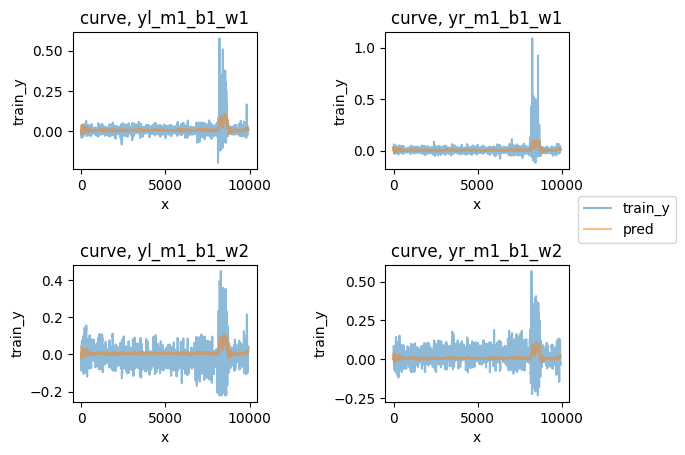

Epoch [10/50], Loss: 0.0006
Epoch [11/50], Loss: 0.0006
Epoch [12/50], Loss: 0.0006
Epoch [13/50], Loss: 0.0006
Epoch [14/50], Loss: 0.0006
Epoch [15/50], Loss: 0.0006
Epoch [16/50], Loss: 0.0006
Epoch [17/50], Loss: 0.0006
Epoch [18/50], Loss: 0.0006
Epoch [19/50], Loss: 0.0006


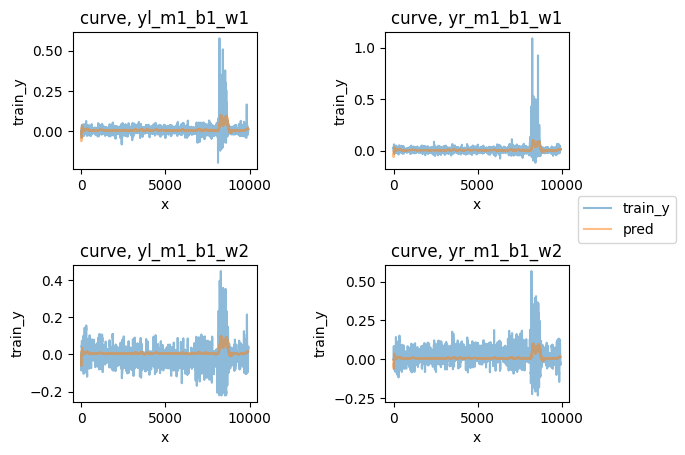

Epoch [20/50], Loss: 0.0006
Epoch [21/50], Loss: 0.0006
Epoch [22/50], Loss: 0.0006
Epoch [23/50], Loss: 0.0006
Epoch [24/50], Loss: 0.0006
Epoch [25/50], Loss: 0.0006
Epoch [26/50], Loss: 0.0006
Epoch [27/50], Loss: 0.0006
Epoch [28/50], Loss: 0.0006
Epoch [29/50], Loss: 0.0006


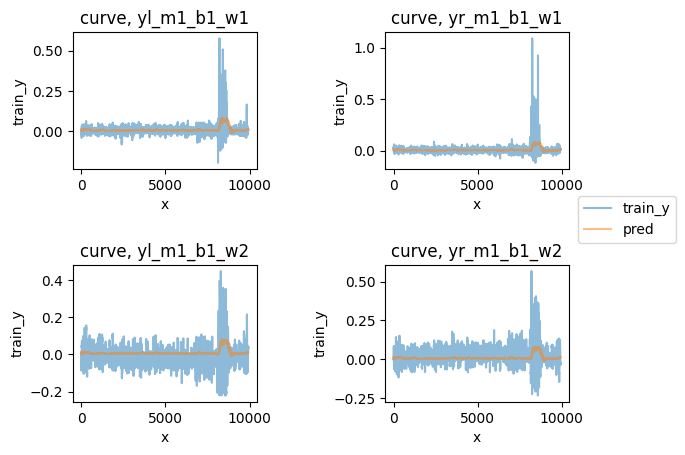

Epoch [30/50], Loss: 0.0006
Epoch [31/50], Loss: 0.0006
Epoch [32/50], Loss: 0.0006
Epoch [33/50], Loss: 0.0006
Epoch [34/50], Loss: 0.0006
Epoch [35/50], Loss: 0.0006
Epoch [36/50], Loss: 0.0006
Epoch [37/50], Loss: 0.0006
Epoch [38/50], Loss: 0.0006
Epoch [39/50], Loss: 0.0006


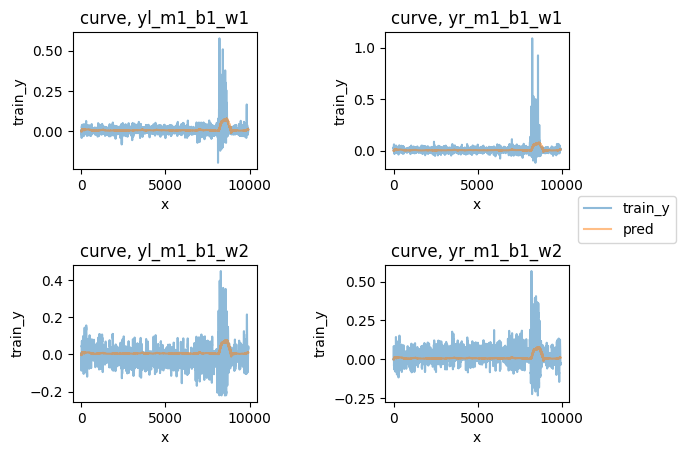

Epoch [40/50], Loss: 0.0006
Epoch [41/50], Loss: 0.0006
Epoch [42/50], Loss: 0.0006
Epoch [43/50], Loss: 0.0006
Epoch [44/50], Loss: 0.0006
Epoch [45/50], Loss: 0.0006
Epoch [46/50], Loss: 0.0006
Epoch [47/50], Loss: 0.0006
Epoch [48/50], Loss: 0.0006
Epoch [49/50], Loss: 0.0006


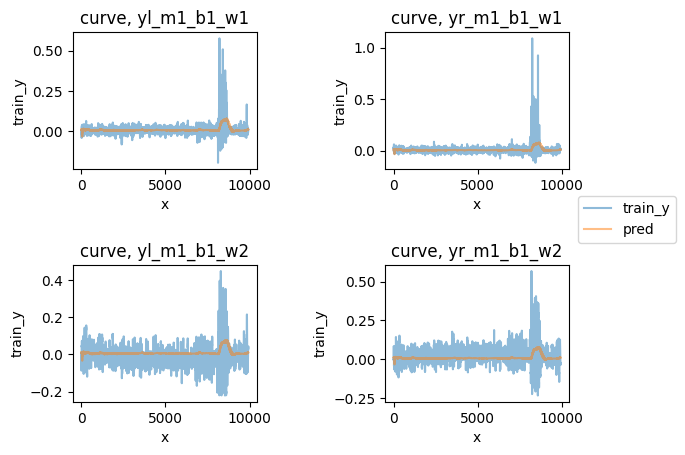

Epoch [50/50], Loss: 0.0006


RuntimeError: ignored

In [ ]:
from unicodedata import bidirectional
input_size_c = 36
input_size_s = 38

batch_size = 4
hidden_size = 64
output_size = 8
num_layers = 2  # GRU 층의 개수
device = torch.device("cuda")

class MultivariateGRU(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, seq_len, output_size,bidirectional=False):
    super(MultivariateGRU, self).__init__()
    self.hidden_size = hidden_size
    self.input_size = output_size
    self.output_size = output_size
    self.num_layers = num_layers
    self.seq_len = seq_len
    self.hidden_state = None
    self.b_bd = bidirectional
    self.int_bd = 1+int(self.b_bd)

    self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True, bidirectional=self.b_bd)
    self.fc = nn.Linear(self.hidden_size, output_size)

  def forward(self, x):
    if self.hidden_state is None:
      self.hidden_state = torch.zeros(self.int_bd*self.num_layers, x.size(0), self.hidden_size, dtype=torch.float).to(x.device)

    out, hid = self.gru(x, self.hidden_state.detach())
    # hid = self.fc(hid[self.num_layers-1]).flatten()
    if self.b_bd:
      out = (out[:,:,:self.hidden_size]+out[:,:,self.hidden_size:])/2
    out = self.fc(out[:,-1,:])
    return out


# 모델 인스턴스 생성
model = MultivariateGRU(input_size_c, hidden_size, num_layers, seq_len, output_size,True)
model.to(device)

# 모델 확인
print(model)

# 손실 함수와 최적화 알고리즘 설정
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)

# 모델 학습 및 예측
num_epochs = 50
plot_idx = 10

def train_pred_model_batch(num_epoch, train_lst, test_lst, model,dat_nm):
  output_ = ['yl_m1_b1_w1','yr_m1_b1_w1','yl_m1_b1_w2','yr_m1_b1_w2']
  # train model
  for epoch in range(num_epochs):
    pred=[]; real=[]
    for train_x, train_y in train_lst[dat_nm]:
      train_x = train_x[0]
      train_y = train_y[0]
      torch.manual_seed(42)
      optimizer.zero_grad()

      # 모델에 데이터 전달
      predictions = model(train_x.float().to(device))
      # 손실 계산
      loss = criterion(predictions, train_y.float().to(device))

      # 역전파 및 가중치 갱신
      loss.backward()
      optimizer.step()

      if epoch % plot_idx == plot_idx-1:
        pred.append(predictions.to('cpu').detach().numpy())
        real.append(train_y.numpy())

    if epoch % plot_idx == plot_idx-1:
      pred = np.concatenate(pred,axis=1)
      real = np.concatenate(real,axis=1)
      plt_dat = [pd.DataFrame({'x':np.arange(0,pred.shape[1],1),'pred':pred[i,:],'train_y':real[i,:]}) for i in range(4)]
      for i in range(4):
        plt.subplot(2,2,i+1)
        if i==1:
          sns.lineplot(plt_dat[i],x='x',y='train_y',alpha=.5,label='train_y')
          sns.lineplot(plt_dat[i],x='x',y='pred',alpha=.5,label='pred')
          plt.legend(bbox_to_anchor=(1.05, -0.2), loc='upper left', borderaxespad=0)
        else:
          sns.lineplot(plt_dat[i],x='x',y='train_y',alpha=.5)
          sns.lineplot(plt_dat[i],x='x',y='pred',alpha=.5)
        if 'c' in dat_nm:
          plt.title(f'curve, {output_[i]}')
        else:
          plt.title(f'straight, {output_[i]}')

      plt.subplots_adjust(hspace=0.7, wspace=0.7)
      plt.show()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

  # predict model
  model.eval()
  with torch.no_grad():
    cnt = 0
    output_tensor = torch.tensor(0)
    for test_x in test_lst['data_c30']:
      test_x = test_x[0][0]
      if cnt>0:
        # y value
        if cnt*dist_lag*4 < seq_len:
          test_x[:,-min(seq_len,cnt*dist_lag*4):,-2] = torch.Tensor(output_tensor[:min(cnt*dist_lag*4, seq_len)]).float()
        else:
          test_x[:,:,-2] = output_tensor[-seq_len:]
        # y lag
        if cnt*dist_lag*4 > output_size:
          test_x[:,-min(cnt*dist_lag*4-output_size, seq_len):,-1] = output_tensor[-seq_len:][-min(cnt*dist_lag*4-output_size, seq_len):].float()

      output = model(test_x.float().to(device))
      if cnt==0:
        output_tensor = dc(output)
      else:
        output_tensor = torch.concat([output_tensor,output],axis=1)
      cnt += 1

  return output_tensor

pred_ = train_pred_model_batch(num_epochs, c30_train, c30_test, model,'data_c30')
pred_

In [ ]:
device = torch.device('cuda:0')  # 첫 번째 GPU 선택
# 또는
torch.cuda.set_device(0)  # 첫 번째 GPU 선택

# GPU 메모리 캐시 비우기
torch.cuda.empty_cache()
gc.collect()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  getpass.getpass = self._save_getpass


735